In [7]:

import numpy as np
from sklearn import tree

import pandas as pd

df=pd.read_csv("/content/PlayTennis.csv")


entropy_s = 0

for c in df['Play Tennis'].unique():
  p_c = df['Play Tennis'].value_counts()[c] / len(df['Play Tennis'])
  if p_c > 0:
    entropy_s -= p_c * np.log2(p_c)

print("Entropy of the target variable:", entropy_s)
tree = build_tree(df)

print(tree)


Entropy of the target variable: 0.9402859586706311
Entropy  Outlook  :  0.6935361388961918
Information gain  Outlook  :  0.24674981977443933
Entropy  Temperature  :  0.9110633930116763
Information gain  Temperature  :  0.02922256565895487
Entropy  Humidity  :  0.7884504573082896
Information gain  Humidity  :  0.15183550136234159
Entropy  Wind  :  0.8921589282623617
Information gain  Wind  :  0.04812703040826949
Best Feature:  Outlook
Max information ganied:  Outlook


Entropy  Outlook  :  0.9709505944546686
Information gain  Outlook  :  0.0
Entropy  Temperature  :  0.4
Information gain  Temperature  :  0.5709505944546686
Entropy  Humidity  :  0.0
Information gain  Humidity  :  0.9709505944546686
Entropy  Wind  :  0.9509775004326937
Information gain  Wind  :  0.01997309402197489
Best Feature:  Humidity
Max information ganied:  Humidity


Entropy  Outlook  :  0.9709505944546686
Information gain  Outlook  :  0.0
Entropy  Temperature  :  0.9509775004326937
Information gain  Temperature  : 

In [8]:
def calculate_information_gain(df, feature):
  entropy_s = 0
  for c in df['Play Tennis'].unique():
    p_c = df['Play Tennis'].value_counts()[c] / len(df['Play Tennis'])
    if p_c > 0:
      entropy_s -= p_c * np.log2(p_c)

  entropy_f = 0
  for value in df[feature].unique():
    sub_df = df[df[feature] == value]
    entropy_f_c = 0
    for c in sub_df['Play Tennis'].unique():
      p_c = sub_df['Play Tennis'].value_counts()[c] / len(sub_df['Play Tennis'])
      if p_c > 0:
        entropy_f_c -= p_c * np.log2(p_c)
    entropy_f += len(sub_df) / len(df) * entropy_f_c

  information_gain = entropy_s - entropy_f

  print("Entropy ",feature," : ",entropy_f)
  print("Information gain ",feature," : ",information_gain)
  return information_gain

def build_tree(df):
  if len(df['Play Tennis'].unique()) == 1:
    return df['Play Tennis'].iloc[0]

  best_feature = None
  max_information_gain = 0
  for feature in df.columns[:-1]:
    information_gain = calculate_information_gain(df, feature)
    if information_gain > max_information_gain:
      best_feature = feature
      max_information_gain = information_gain

  print("Best Feature: ",best_feature)
  print("Max information ganied: ",best_feature)
  print("\n")

  tree = {best_feature: {}}

  for value in df[best_feature].unique():
    sub_df = df[df[best_feature] == value]
    tree[best_feature][value] = build_tree(sub_df)

  return tree



IRIS


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)
print(X_test , y_pred)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [19]:
cm = confusion_matrix(y_test, y_pred)

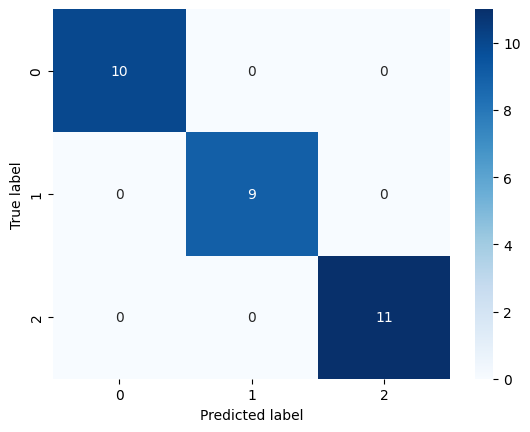

In [20]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0
